Rapport et visualisation de tous les Algorithmes  , leur resultat et comparaison 👌

Commence par la 1ere dataset cel de temperature et precip type ...  
les etapes que je vais suivre :

1-Preparation de données : -detection de valeur manquante 
                          -valeur redondante 
                          -imputaion de valeur manquante
                          -standardisation 
                          -peut etre valeur aberante 
                          
2-Essayer les modeles machine learning et évaluation:
    1-Calssification : -RF classifier 
                       -KNN classifier
                       -SVM
                       -Decision Tree
                       
                       

    2-Regression(prediction) : -Linear regression
                               -logistic regression 
                               -

3-Méthode d'évaluation : -MSE
                         -R²
                         -Accuracy 
                         -Matrice de confusion
                         -
                         
4-Comparaison des modeles selon leur resultat 

5-Essaye autre cible 


In [82]:
#Chargement de la dataset
import pandas as pd
df = pd.read_csv('Dataset1.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [83]:
#Verifier les valeurs manquantes
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Il y a 517 valeur manquante dans la colonne  "Precip Type"

-1ere methode :je vais faire l'imputation avec les valeur les plus frequent 

In [84]:
#preparation des données
#je vais essayer de remplir les valeurs manquantes de la colonne "Precip Type" avec la valeur la plus fréquente (mode) de cette colonne.
mode_value = df['Precip Type'].mode()[0]
df['Precip Type'].fillna(mode_value, inplace=True)
df.isnull().sum()
df_freq = df
X_df_freq = df_freq.drop(columns=['Precip Type'])
y_df_freq = df_freq['Precip Type']
#exemple des valeur imputer
print("Valeurs imputées :\n", df['Precip Type'].value_counts(),"\n","somme des valeurs manquantes apres imputation :",df['Precip Type'].isnull().sum())

Valeurs imputées :
 Precip Type
rain    85741
snow    10712
Name: count, dtype: int64 
 somme des valeurs manquantes apres imputation : 0


C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\1793340445.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna(mode_value, inplace=True)


In [85]:
#essayé d'autres methodes pour le traitement des valeurs manquantes
#2eme methode : suppression des lignes avec des valeurs manquantes
df = pd.read_csv('Dataset1.csv')
print("Nombre de lignes avant suppression des valeurs manquantes :", len(df))
df_drop = df.dropna()
#afficher le nombre de lignes après la suppression
print("Nombre de lignes après suppression des valeurs manquantes :", len(df_drop))

Nombre de lignes avant suppression des valeurs manquantes : 96453
Nombre de lignes après suppression des valeurs manquantes : 95936


Encoder les valeur categoriel 

In [86]:
#encoder les vairables catégorielles
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Dataset1.csv')
# === 1️⃣ Séparation des features et de la cible ===
X = df.drop(columns=['Precip Type'])
y = df['Precip Type']

# === 2️⃣ Encodage des colonnes catégorielles de X si nécessaire ===
for col in X.columns:
    if X[col].dtype == 'object':
        le_col = LabelEncoder()
        X[col] = le_col.fit_transform(X[col].astype(str))

# === 3️⃣ Encodage de y sans toucher aux NaN ===
le_y = LabelEncoder()
mask = y.notnull()
y_encoded = pd.Series(index=y.index, dtype=float)
y_encoded[mask] = le_y.fit_transform(y[mask])
y = y_encoded

#verifier le resultat
print("les colonnes de X :",X.head(3))
print("les valeurs de y :",y.head(3))

les colonnes de X :    Formatted Date  Summary  Temperature (C)  Apparent Temperature (C)  \
0            2159       19         9.472222                  7.388889   
1            2160       19         9.355556                  7.227778   
2            2161       17         9.377778                  9.377778   

   Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
0      0.89            14.1197                   251.0          15.8263   
1      0.86            14.2646                   259.0          15.8263   
2      0.89             3.9284                   204.0          14.9569   

   Loud Cover  Pressure (millibars)  Daily Summary  
0         0.0               1015.13            197  
1         0.0               1015.63            197  
2         0.0               1015.94            197  
les valeurs de y : 0    0.0
1    0.0
2    0.0
dtype: float64


Imputation avec KNN apres encodage

In [87]:
#imputation avec KNNimputer
from sklearn.impute import KNNImputer
df = pd.concat([X, y_encoded.rename('Precip Type')], axis=1)

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X_imputed = df_imputed.drop(columns=['Precip Type'])
y_imputed = df_imputed['Precip Type'].round().astype(int)

y_final = le_y.inverse_transform(y_imputed.values)

print("Valeurs manquantes après imputation :", pd.Series(y_final).isnull().sum())
print("Exemples des valeurs imputées :", y_final[:10])
df_imputed.isnull().sum()


Valeurs manquantes après imputation : 0
Exemples des valeurs imputées : ['rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain']


Formatted Date              0
Summary                     0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
Precip Type                 0
dtype: int64

2-Essayer les modeles de classification  

In [88]:
#Modele de classification : RF+KNN classifier sur les données imputées avec KNN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
accuracy_score1 = accuracy_score(y_test, model_rf.predict(X_test))
y_pred_rf = model_rf.predict(X_test)

print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))
print("Précision : ", accuracy_score1)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
accuracy_score2 = accuracy_score(y_test, y_pred_knn)
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn))
print("Précision : ", accuracy_score2)




Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17101
           1       1.00      1.00      1.00      2190

    accuracy                           1.00     19291
   macro avg       1.00      1.00      1.00     19291
weighted avg       1.00      1.00      1.00     19291

Précision :  1.0
Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17101
           1       0.87      0.85      0.86      2190

    accuracy                           0.97     19291
   macro avg       0.93      0.92      0.92     19291
weighted avg       0.97      0.97      0.97     19291

Précision :  0.9687937380125448


In [89]:
#Avec standardisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)
accuracy_score3 = accuracy_score(y_test, y_pred_rf)
print("Rapport de classification :\n", classification_report(y_test, y_pred_rf))
print("Précision : ", accuracy_score3)

model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)
accuracy_score4 = accuracy_score(y_test, y_pred_knn)
print("Rapport de classification :\n", classification_report(y_test, y_pred_knn))
print("Précision : ", accuracy_score4)


Rapport de classification :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17101
           1       1.00      1.00      1.00      2190

    accuracy                           1.00     19291
   macro avg       1.00      1.00      1.00     19291
weighted avg       1.00      1.00      1.00     19291

Précision :  1.0
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     17101
           1       0.93      0.90      0.91      2190

    accuracy                           0.98     19291
   macro avg       0.96      0.95      0.95     19291
weighted avg       0.98      0.98      0.98     19291

Précision :  0.9806645586024572


C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\3735625942.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


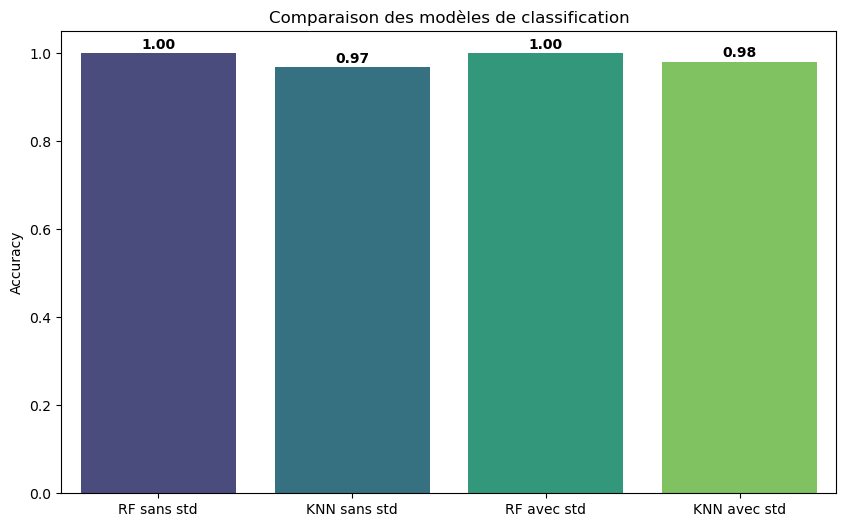

In [90]:

#avec graphes
import matplotlib.pyplot as plt
models = ['RF sans std', 'KNN sans std', 'RF avec std', 'KNN avec std']
accuracies = [accuracy_score1, accuracy_score2, accuracy_score3, accuracy_score4]
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylabel('Accuracy')
plt.title('Comparaison des modèles de classification')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()



Dans le cas de Dataset imputer avec KNN

On remarque que avec standardisation on a eu des resultat pour le KNN meilleur que sans standardisation

et on remarque que RF donne des resultats meilleur que KNN 

Rapport de classification :
               precision    recall  f1-score   support

        rain       1.00      1.00      1.00     17101
        snow       1.00      1.00      1.00      2190

    accuracy                           1.00     19291
   macro avg       1.00      1.00      1.00     19291
weighted avg       1.00      1.00      1.00     19291

Précision :  1.0
Rapport de classification :
               precision    recall  f1-score   support

        rain       0.98      0.98      0.98     17101
        snow       0.87      0.85      0.86      2190

    accuracy                           0.97     19291
   macro avg       0.93      0.92      0.92     19291
weighted avg       0.97      0.97      0.97     19291

Précision :  0.9687937380125448
Rapport de classification :
               precision    recall  f1-score   support

        rain       1.00      1.00      1.00     17101
        snow       1.00      1.00      1.00      2190

    accuracy                           1.00   

C:\Users\MSI\AppData\Local\Temp\ipykernel_18736\3693923257.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models_freq, y=accuracies_freq, palette='magma')


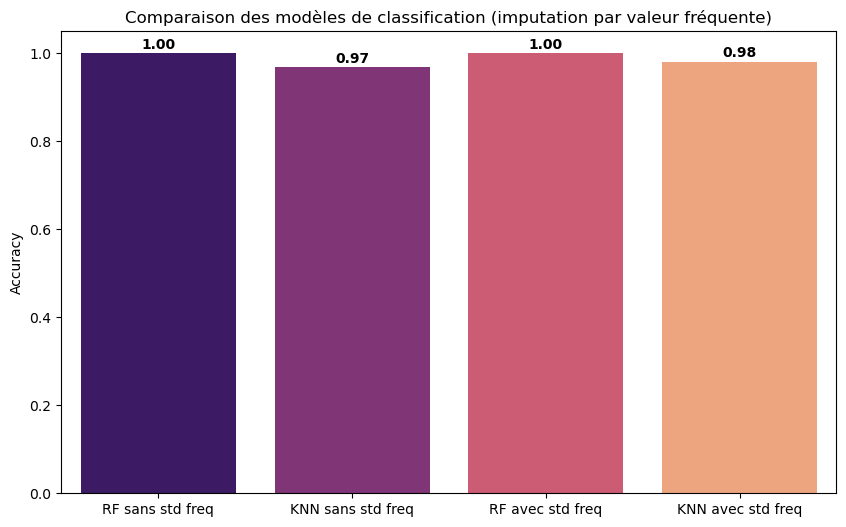

In [91]:
#avec les données imputées par la methode de la valeur la plus fréquente
#encoder les valeur categoriel

# === 2️⃣ Encodage des colonnes catégorielles de X si nécessaire ===
for col in X_df_freq.columns:
    if X_df_freq[col].dtype == 'object':
        le_col = LabelEncoder()
        X_df_freq[col] = le_col.fit_transform(X_df_freq[col].astype(str))

# === 3️⃣ Encodage de y sans toucher aux NaN ===
le_y = LabelEncoder()
mask = y_df_freq.notnull()
y_encoded = pd.Series(index=y.index, dtype=float)
y_encoded[mask] = le_y.fit_transform(y[mask])
y = y_encoded

X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X_df_freq, y_df_freq, test_size=0.2, random_state=42)

model_rf.fit(X_train_freq, y_train_freq)
y_pred_rf_freq = model_rf.predict(X_test_freq)
accuracy_score5 = accuracy_score(y_test_freq, y_pred_rf_freq)
print("Rapport de classification :\n", classification_report(y_test_freq, y_pred_rf_freq))
print("Précision : ", accuracy_score5)

model_knn.fit(X_train_freq, y_train_freq)
y_pred_knn_freq = model_knn.predict(X_test_freq)
accuracy_score6 = accuracy_score(y_test_freq, y_pred_knn_freq)
print("Rapport de classification :\n", classification_report(y_test_freq, y_pred_knn_freq))
print("Précision : ", accuracy_score6)

#avec standardisation des données
X_train_freq_scaled = scaler.fit_transform(X_train_freq)
X_test_freq_scaled = scaler.transform(X_test_freq)
model_rf.fit(X_train_freq_scaled, y_train_freq)
y_pred_rf_freq = model_rf.predict(X_test_freq_scaled)
accuracy_score7 = accuracy_score(y_test_freq, y_pred_rf_freq)
print("Rapport de classification :\n", classification_report(y_test_freq, y_pred_rf_freq))
print("Précision : ", accuracy_score7)
model_knn.fit(X_train_freq_scaled, y_train_freq)
y_pred_knn_freq = model_knn.predict(X_test_freq_scaled)
accuracy_score8 = accuracy_score(y_test_freq, y_pred_knn_freq)
print("Rapport de classification :\n", classification_report(y_test_freq, y_pred_knn_freq))
print("Précision : ", accuracy_score8)
#avec graphes
models_freq = ['RF sans std freq', 'KNN sans std freq', 'RF avec std freq', 'KNN avec std freq']
accuracies_freq = [accuracy_score5, accuracy_score6, accuracy_score7, accuracy_score8]
plt.figure(figsize=(10, 6))
sns.barplot(x=models_freq, y=accuracies_freq, palette='magma')
plt.ylabel('Accuracy')
plt.title('Comparaison des modèles de classification (imputation par valeur fréquente)')
for i, v in enumerate(accuracies_freq):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

On remarque les meme resultat pour les deux methodes d'imputation

j'ai ajouté l'encoder pour entrainée KNN qui n'accepte aps les valeur de type string

Essaye autre methode (SVM classifier ) de classification avec les données stanrdadisée et Imputer avec KNN 


Rapport de classification SVC :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     17101
           1       0.95      0.98      0.96      2190

    accuracy                           0.99     19291
   macro avg       0.97      0.99      0.98     19291
weighted avg       0.99      0.99      0.99     19291

Précision SVC :  0.9916541392359132


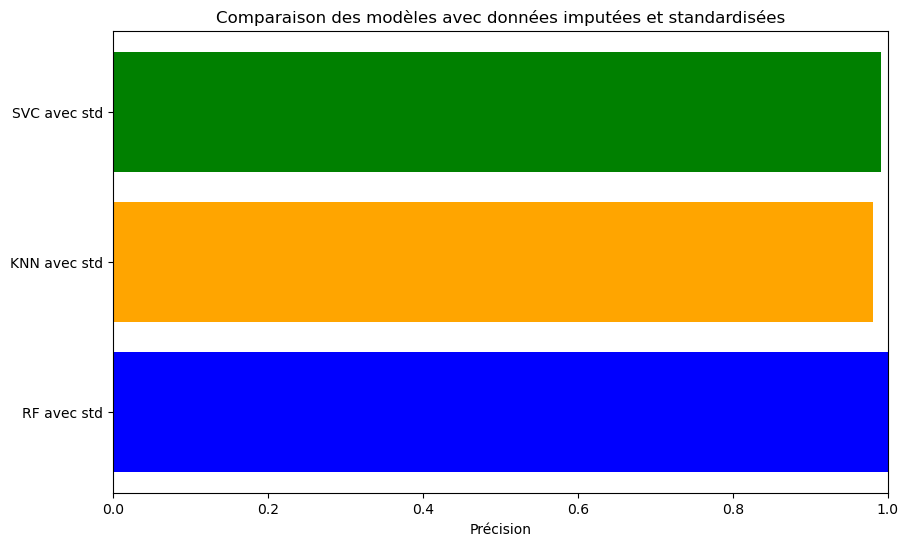

In [92]:
#autre methodes de classification utilisants les données imputer avec KNN et standardisation
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)
y_pred_svc = model_svc.predict(X_test_scaled)
accuracy_score_svc = accuracy_score(y_test, y_pred_svc)
print("Rapport de classification SVC :\n", classification_report(y_test, y_pred_svc))
print("Précision SVC : ", accuracy_score_svc)
#comparer avec les autres modeles
models_extended = ['RF avec std', 'KNN avec std', 'SVC avec std']
accuracies_extended = [accuracy_score3, accuracy_score4, accuracy_score_svc]
plt.figure(figsize=(10, 6))
plt.barh(models_extended, accuracies_extended, color=['blue', 'orange', 'green'])
plt.xlabel("Précision")
plt.title("Comparaison des modèles avec données imputées et standardisées")
plt.xlim(0, 1)
plt.show()


ON remarque que SVM est donne de resultat meilleur que le KNN 

2eme partie regression avec linear regression et Logistic regression 

In [93]:
#Methodes de regression avec les données imputées avec KNN et standardisation
from sklearn.linear_model import LinearRegression, LogisticRegression
#Préparation des données pour la régression
X_reg = X_imputed
y_reg = y_imputed
#Séparation des données en ensembles d'entraînement et de test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
#Régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_lin = lin_reg.predict(X_test_reg)
#Évaluation de la régression linéaire
from sklearn.metrics import mean_squared_error, r2_score
mse_lin = mean_squared_error(y_test_reg, y_pred_lin)
r2_lin = r2_score(y_test_reg, y_pred_lin)
print("Régression Linéaire - MSE :", mse_lin)
print("Régression Linéaire - R² :", r2_lin)
#Régression logistique
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_reg, y_train_reg)
y_pred_log = log_reg.predict(X_test_reg)
#Évaluation de la régression logistique
print("Régression Logistique - Rapport de classification :\n", classification_report(y_test_reg, y_pred_log))
accuracy_log = accuracy_score(y_test_reg, y_pred_log)
print("Régression Logistique - Précision :", accuracy_log)


Régression Linéaire - MSE : 0.06215033806787295
Régression Linéaire - R² : 0.38242834383541346
Régression Logistique - Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     17101
           1       0.94      0.96      0.95      2190

    accuracy                           0.99     19291
   macro avg       0.97      0.97      0.97     19291
weighted avg       0.99      0.99      0.99     19291

Régression Logistique - Précision : 0.9884402052770722


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#

Régression Arbre de Décision - MSE : 0.0
Régression Arbre de Décision - R² : 1.0


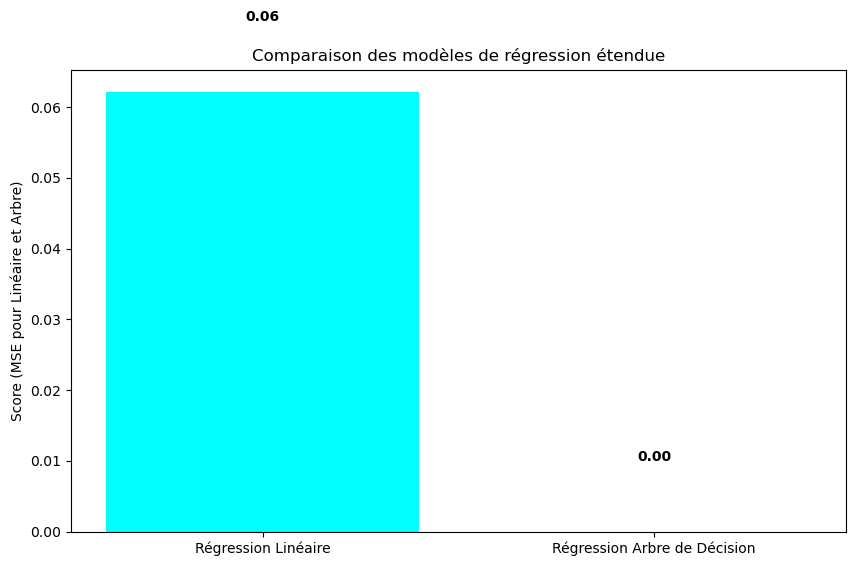

In [ ]:
#autre methodes de regression si necessaire
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reg, y_train_reg)
y_pred_dt = dt_reg.predict(X_test_reg)
#Évaluation de la régression par arbre de décision
mse_dt = mean_squared_error(y_test_reg, y_pred_dt)
r2_dt = r2_score(y_test_reg, y_pred_dt)
print("Régression Arbre de Décision - MSE :", mse_dt)
print("Régression Arbre de Décision - R² :", r2_dt)
#comparaison avec les autres modeles de regression
plt.figure(figsize=(10, 6))
bars = plt.bar(['Régression Linéaire', 'Régression Arbre de Décision'], [mse_lin, mse_dt], color=['cyan', 'magenta'])
plt.ylabel('Score (MSE pour Linéaire et Arbre)')
plt.title('Comparaison des modèles de régression étendue')
for bar, score in zip(bars, [mse_lin, mse_dt]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', fontweight='bold')
plt.show()

On remarque que DT a donnée un resultat parfais 0 erreurs donc c'est le meilleur modele de regression aprés Logistique et puis Linéaire


On va prendre la dataset imputer avec KNN et appliquer les modeles de regression les evaluer et faire la comparaison

Régression Arbre de Décision (Humidity) - MSE : 0.012047830594577784
Régression Arbre de Décision (Humidity) - R² : 0.686039547561358
Régression Linéaire (Humidity) - MSE : 0.018843551806529173
Régression Linéaire (Humidity) - R² : 0.5089464444004144


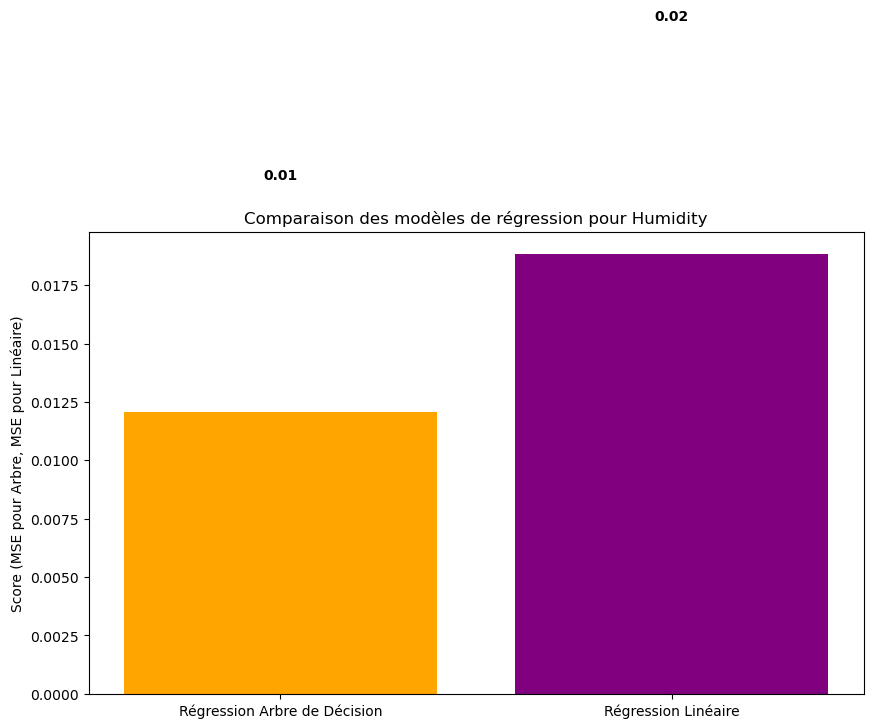

In [95]:

#encoder les variables catégorielles

for col in df_imputed.columns:
    if df_imputed[col].dtype == 'object':
        le_col = LabelEncoder()
        df_imputed[col] = le_col.fit_transform(df_imputed[col].astype(str))
X = df_imputed.drop(columns=['Humidity'])
y = df_imputed['Humidity']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
#Évaluation de la régression par arbre de décision
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Régression Arbre de Décision (Humidity) - MSE :", mse_dt)
print("Régression Arbre de Décision (Humidity) - R² :", r2_dt)
#linear regression
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
#Évaluation de la régression linéaire
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("Régression Linéaire (Humidity) - MSE :", mse_lin)
print("Régression Linéaire (Humidity) - R² :", r2_lin)
#comparaison avec les autres modeles de regression
models_reg_extended = ['Régression Arbre de Décision', 'Régression Linéaire']
scores_reg_extended = [mse_dt, mse_lin]
plt.figure(figsize=(10, 6))
bars = plt.bar(models_reg_extended, scores_reg_extended, color=['orange', 'purple'])
plt.ylabel('Score (MSE pour Arbre, MSE pour Linéaire)')
plt.title('Comparaison des modèles de régression pour Humidity')
for bar, score in zip(bars, scores_reg_extended):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', fontweight='bold')
plt.show()


Ici on remarque que Arbre de decision est meilleur que regression linear

On ajoute quelque modele de regression tels que lasso et ridge et comparer les resultat

Régression Lasso (Humidity) - MSE : 0.02086448268874402
Régression Lasso (Humidity) - R² : 0.45628199422023386
Régression Ridge (Humidity) - MSE : 0.01884355094862712
Régression Ridge (Humidity) - R² : 0.5089464667569139


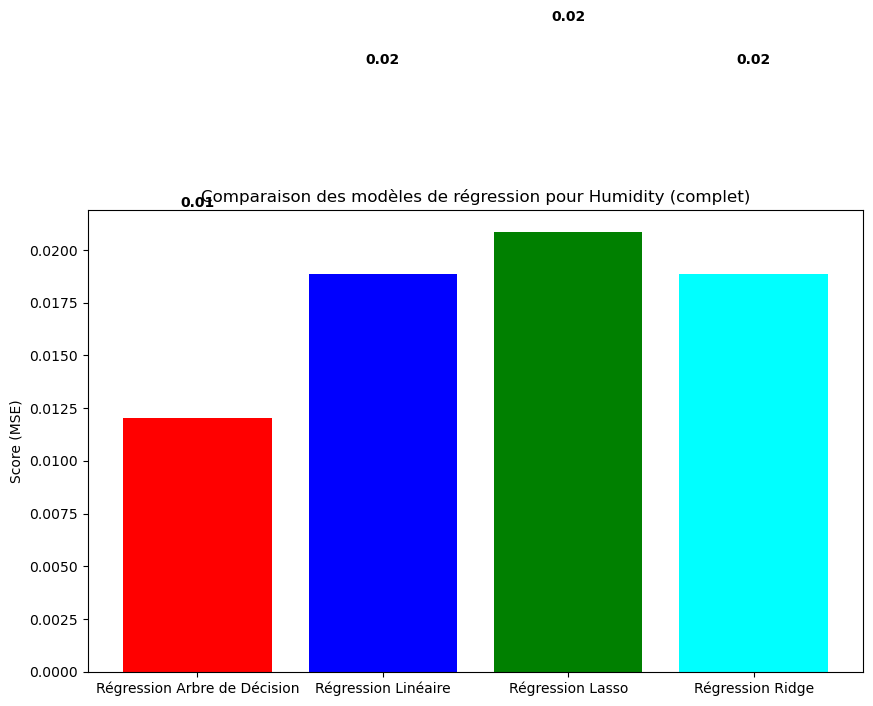

In [96]:
#ajouter regression lasso et ridge si necessaire
from sklearn.linear_model import Lasso, Ridge
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Régression Lasso (Humidity) - MSE :", mse_lasso)
print("Régression Lasso (Humidity) - R² :", r2_lasso)

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Régression Ridge (Humidity) - MSE :", mse_ridge)
print("Régression Ridge (Humidity) - R² :", r2_ridge)
#comparaison avec les autres modeles de regression
models_reg_full = ['Régression Arbre de Décision', 'Régression Linéaire', 'Régression Lasso', 'Régression Ridge']
scores_reg_full = [mse_dt, mse_lin, mse_lasso, mse_ridge]
plt.figure(figsize=(10, 6))
bars = plt.bar(models_reg_full, scores_reg_full, color=['red', 'blue',
    'green', 'cyan'])
plt.ylabel('Score (MSE)')
plt.title('Comparaison des modèles de régression pour Humidity (complet)')
for bar, score in zip(bars, scores_reg_full):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', fontweight='bold')
plt.show()

ON remarque que DT est meilleur algorithme avec des données imputer avec KNN non standardise


Régression Arbre de Décision (Humidity) avec std - MSE : 0.012035799077289928
Régression Arbre de Décision (Humidity) avec std - R² : 0.6863530828971651
Régression Linéaire (Humidity) avec std - MSE : 0.018843551806529177
Régression Linéaire (Humidity) avec std - R² : 0.5089464444004144
Régression Lasso (Humidity) avec std - MSE : 0.03309494343477739
Régression Lasso (Humidity) avec std - R² : 0.13756229118209062
Régression Ridge (Humidity) avec std - MSE : 0.01884355205105257
Régression Ridge (Humidity) avec std - R² : 0.5089464380282567


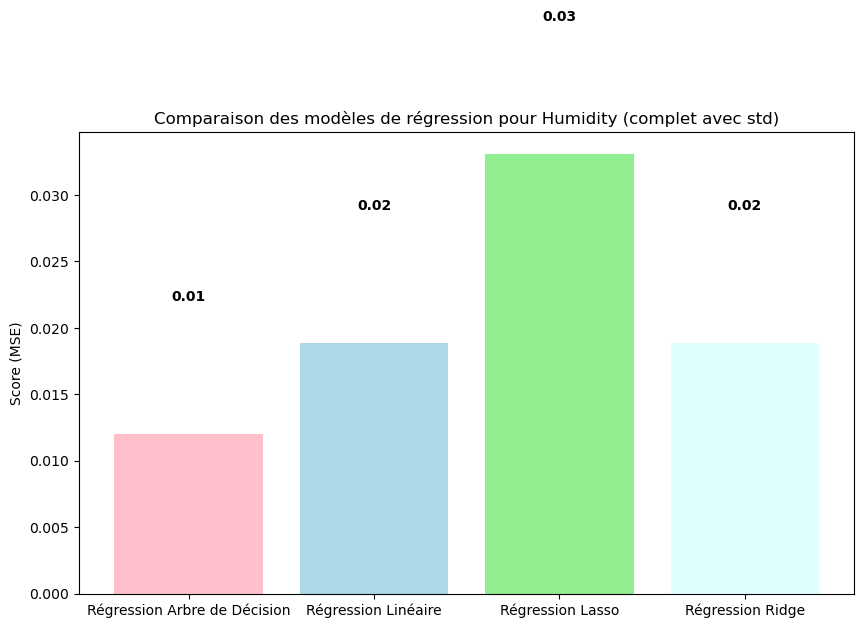

In [97]:
#meme travail avec standardisation et KNN imputer 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#regression avec arbre de decision et linear regression et lasso et ridge
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Régression Arbre de Décision (Humidity) avec std - MSE :", mse_dt)
print("Régression Arbre de Décision (Humidity) avec std - R² :", r2_dt)
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("Régression Linéaire (Humidity) avec std - MSE :", mse_lin)
print("Régression Linéaire (Humidity) avec std - R² :", r2_lin)
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Régression Lasso (Humidity) avec std - MSE :", mse_lasso)
print("Régression Lasso (Humidity) avec std - R² :", r2_lasso)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Régression Ridge (Humidity) avec std - MSE :", mse_ridge)
print("Régression Ridge (Humidity) avec std - R² :", r2_ridge)
#comparaison avec les autres modeles de regression
models_reg_full_std = ['Régression Arbre de Décision', 'Régression Linéaire', 'Régression Lasso', 'Régression Ridge']
scores_reg_full_std = [mse_dt, mse_lin, mse_lasso, mse_ridge]
plt.figure(figsize=(10, 6))
bars = plt.bar(models_reg_full_std, scores_reg_full_std, color=['pink', 'lightblue',
    'lightgreen', 'lightcyan'])
plt.ylabel('Score (MSE)')
plt.title('Comparaison des modèles de régression pour Humidity (complet avec std)')
for bar, score in zip(bars, scores_reg_full_std):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{score:.2f}", ha='center', fontweight='bold')
plt.show()


On peut remarquer que scaler a affecter d une facon negatif sur l'algorithme de regression lasso 

Et DT reste le meilleur